In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

# Import Data 

In [35]:
track_df=pd.read_csv("tracks_features.csv")
print(track_df.columns)
track_df.head()

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


# Data Analysis 

<AxesSubplot:>

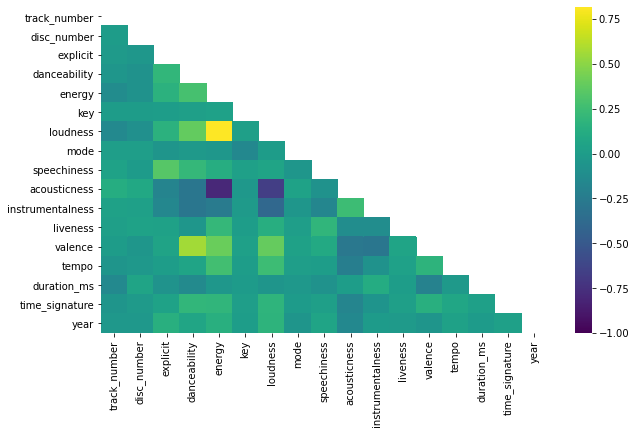

In [4]:
plt.figure(figsize=(10,6))
corr=track_df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=False)

# Preprocess Dataframe

In [6]:
track_df[['artists','name']]

,artists,name
0,['Rage Against The Machine'],Testify
1,['Rage Against The Machine'],Guerrilla Radio
2,['Rage Against The Machine'],Calm Like a Bomb
3,['Rage Against The Machine'],Mic Check
4,['Rage Against The Machine'],Sleep Now In the Fire
...,...,...
1204020,['FVLCRVM'],Gospel of Juke
1204021,['FVLCRVM'],Prism Visions
1204022,['FVLCRVM'],Tokyo 360
1204023,['FVLCRVM'],Yummy!


In [7]:
def select_cols(df):
       return df[['artists','id','name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

track_dfp=select_cols(track_df)
track_dfp.head()

,artists,id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,['Rage Against The Machine'],7lmeHLHBe4nmXzuXc0HDjk,Testify,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906
1,['Rage Against The Machine'],1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680
2,['Rage Against The Machine'],1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749
3,['Rage Against The Machine'],2lbASgTSoDO7MTuLAXlTW0,Mic Check,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752
4,['Rage Against The Machine'],1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059


# Clustering Preprocessing

In [8]:
#Scaling Data 

from sklearn.preprocessing import StandardScaler 
def scale_data(dataframe):
    df=dataframe.select_dtypes(np.number)
    number_cols=list(df.columns)
    scaler=StandardScaler()
    scaled_x=scaler.fit_transform(df.values)
    scaled_df=pd.DataFrame(scaled_x,columns=df.columns)
    print(scaled_df.head())
    return scaled_df

scaled_df=scale_data(track_dfp)

   danceability    energy       key  loudness      mode  speechiness  \
0     -0.121562  1.589717  0.510599  0.918016  0.699495    -0.100716   
1      0.558569  1.518454  1.641587  0.865739  0.699495     0.893324   
2     -0.938773  1.562569  0.510599  0.914435  0.699495     3.436618   
3     -0.279732  1.552388  1.641587  0.856287 -1.429603     1.315769   
4     -0.353544  1.423437 -0.903137  0.727529  0.699495    -0.123132   

   acousticness  instrumentalness  liveness   valence     tempo  
0     -1.092029         -0.751691  0.855599  0.277330  0.008781  
1     -1.126297         -0.751533 -0.258227  0.225571 -0.451057  
2     -1.099039         -0.751715 -0.441094 -0.214381  1.038065  
3     -0.736631         -0.751711 -0.446636  0.539822 -0.674995  
4     -1.155581         -0.472676 -0.679930  0.410424  0.304640  


In [9]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca.fit(scaled_df)
pca_dfp=pca.transform(scaled_df)

# K-Means Clustering

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [57]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_dfp)
    wcss.append(kmeans.inertia_)

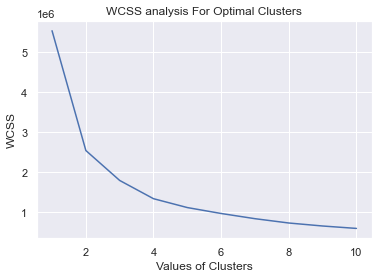

In [59]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('Values of Clusters') 
plt.ylabel('WCSS') 
plt.title('WCSS analysis For Optimal Clusters')
plt.show()

In [60]:
kmeans=KMeans(n_clusters=2 , verbose=2)
kmeans.fit(pca_dfp)

Initialization complete
Iteration 0, inertia 4825319.036885269
Iteration 1, inertia 2815231.007971715
Iteration 2, inertia 2605274.202318157
Iteration 3, inertia 2558910.8257420803
Iteration 4, inertia 2547351.5532049886
Iteration 5, inertia 2544352.5078764562
Iteration 6, inertia 2543556.335175425
Iteration 7, inertia 2543351.426701178
Converged at iteration 7: center shift 7.01225336400738e-05 within tolerance 0.0002298799599551265.
Initialization complete
Iteration 0, inertia 4659731.159471334
Iteration 1, inertia 2561975.2766133626
Iteration 2, inertia 2545412.5215864554
Iteration 3, inertia 2543635.8652553097
Iteration 4, inertia 2543359.3659248403
Converged at iteration 4: center shift 7.919156995893021e-05 within tolerance 0.0002298799599551265.
Initialization complete
Iteration 0, inertia 4119441.2540626614
Iteration 1, inertia 2981716.9776873942
Iteration 2, inertia 2662919.058721712
Iteration 3, inertia 2575240.6208669385
Iteration 4, inertia 2551831.6537835104
Iteration 5, i

KMeans(n_clusters=2, verbose=2)

In [61]:
spotify_kmeans=track_dfp.copy()
spotify_kmeans['cluster_label']=kmeans.predict(pca_dfp)

# Gaussian Mixture

In [51]:
from sklearn.mixture import GaussianMixture

In [53]:
gaussian=GaussianMixture(n_components=8)
gaussian.fit(pca_dfp)

GaussianMixture(n_components=8)

In [55]:
spotify_gaussian=track_dfp.copy()
spotify_gaussian['cluster_label']=gaussian.predict(pca_dfp)

# Mini-Batch Kmeans Clustering

In [42]:
from sklearn.cluster import MiniBatchKMeans

In [43]:
minikmeans = MiniBatchKMeans(n_clusters=8,random_state=23,batch_size=32)
minikmeans.fit(pca_dfp)

MiniBatchKMeans(batch_size=32, random_state=23)

In [45]:
spotify_kmeans=track_dfp.copy()
spotify_kmeans['cluster_label']=minikmeans.predict(pca_dfp)

# Compare Clustering Models

# Get User Data with Spotify API 

In [70]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id='e894378a77d9492c85494e7a6e6b5b9a', client_secret='24243b151a524a1ab35e6284785e7d1e')
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope="playlist-modify-private", client_id='e894378a77d9492c85494e7a6e6b5b9a', client_secret='24243b151a524a1ab35e6284785e7d1e',redirect_uri="http://example.com"))

In [71]:
#User Test Playlist 
playlist_link = "https://open.spotify.com/playlist/37i9dQZF1DWSqBruwoIXkA?si=1333723a6eff4b7f&nd=1"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"]for x in sp.playlist_tracks(playlist_URI)["items"]]

In [72]:
artist_name=[]
track_url=[]
track_name=[]
danceability=[]
energy=[]
key=[]
loudness=[]
mode=[]
speechiness=[]
acousticness=[]
instrumentalness=[]
liveness=[]
valence=[]
tempo=[]

for track in sp.playlist_tracks(playlist_URI)["items"]:
    
    #Track 
    track_name.append(track["track"]["name"])
    track_id=track["track"]["id"]
    track_url.append(track["track"]["uri"])
    
    #Artist Name
    artist_name.append(track["track"]["artists"][0]["name"])
    
    #Track Attributes 
    track_af=sp.audio_features(track_id)
    danceability.append(track_af[0]['danceability'])
    energy.append(track_af[0]['energy'])
    key.append(track_af[0]['key'])
    loudness.append(track_af[0]['loudness'])
    mode.append(track_af[0]['mode'])
    speechiness.append(track_af[0]['speechiness'])
    acousticness.append(track_af[0]['acousticness'])
    instrumentalness.append(track_af[0]['instrumentalness'])
    liveness.append(track_af[0]['liveness'])
    valence.append(track_af[0]['valence'])
    tempo.append(track_af[0]['tempo'])


In [73]:
track_dataframe = pd.DataFrame({'artists' : artist_name,'id':track_url,'name' : track_name, 'danceability' : danceability, 'energy' : energy, 'key' : key, 'loudness':loudness,'mode':mode,'speechiness':speechiness,'acousticness':acousticness,'instrumentalness':instrumentalness,'liveness':liveness,'valence':valence,'tempo':tempo})
print(track_dataframe.shape)
track_dataframe.to_csv("test_playlist.csv")
track_dataframe.head()

(100, 14)


,artists,id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Charlotte Lawrence,spotify:track:0n7G59orkm7Sh7rvOXAopY,Bodybag,0.477,0.268,4,-10.627,1,0.0355,0.847,0.000000,0.0629,0.127,115.368
1,Jenna Raine,spotify:track:08uYRkYyBrEBAolgY5irVW,Stupid Cupid,0.645,0.465,10,-8.422,1,0.0339,0.115,0.000001,0.2130,0.301,131.916
2,Ed Sheeran,spotify:track:1C0Uqh9cRMLPw9WpZzL4Z1,Eyes Closed - Piano Version,0.602,0.325,2,-7.367,1,0.0424,0.900,0.000011,0.1360,0.437,105.890
3,Cloudy June,spotify:track:7zU7vNJiit9Ep9AtPyuKBl,Love Under The Influence,0.386,0.458,5,-8.791,1,0.0423,0.422,0.000000,0.1020,0.346,137.489
4,Cian Ducrot,spotify:track:22UYp7aAy1XmIYZ1GsnJuB,Part Of Me,0.637,0.513,1,-6.797,1,0.0367,0.518,0.000000,0.1240,0.234,141.907


# Content Based Recommendation System

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
metadata_cols = ['artists','id','name']

song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=2, 
                                   verbose=2))],verbose=True)
X = track_df[features]
song_cluster_pipeline.fit(X)


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.5s
Initialization complete
Iteration 0, inertia 22895878.928487502
Iteration 1, inertia 12003804.563236043
Iteration 2, inertia 11514933.785823666
Iteration 3, inertia 10759843.847978404
Iteration 4, inertia 10375560.771158444
Iteration 5, inertia 10278573.02693207
Iteration 6, inertia 10253987.238237338
Iteration 7, inertia 10247130.79656595
Iteration 8, inertia 10245112.494374808
Iteration 9, inertia 10244526.983652635
Iteration 10, inertia 10244368.26158812
Converged at iteration 10: center shift 6.00260399236519e-05 within tolerance 9.999999999979744e-05.
Initialization complete
Iteration 0, inertia 19652711.389682207
Iteration 1, inertia 10764708.397362022
Iteration 2, inertia 10325210.1414487
Iteration 3, inertia 10263703.375220386
Iteration 4, inertia 10249840.336062634
Iteration 5, inertia 10245916.777560184
Iteration 6, inertia 10244758.617925877
Iteration 7, inertia 10244430.604538007
Iteration 8, inertia 102

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=2, verbose=2))],
         verbose=True)

In [67]:
def recommend(track_dataframe,track_df,n_songs=15):
    #tracks_groupby(track_dataframe)
    
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(track_df[features])
    scaled_dataframe=scaler.transform(track_dataframe[features])
    
    ed_dist = euclidean_distances(scaled_dataframe, scaled_data)
    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = track_df.iloc[index]
    
    return rec_output[metadata_cols]


In [68]:
from sklearn.metrics.pairwise import euclidean_distances

In [74]:
recommend_playlist=(recommend(track_dataframe,track_df))
print(recommend_playlist)

                        artists                      id  \
1156462                 ['Wet']  4vfuIUiQCX24MXZYSKrKUy   
538792   ['Future Of Forestry']  4pPbegnmSMWkdTVyi2gp6f   
297716             ['I Am Jen']  4icPMwpfXuhWLNrGdCsbwf   
624385        ['Blind Willies']  6Uy7goOOmK30zE9Xf6z6iw   
226272    ['Within Temptation']  0ClEsmX3to1Rb4tcHkYmOL   
614837      ['Deborah Bartley']  1jIeSR4zjtUwq8Gqt8Snts   
316746          ['Ripp + Rice']  2JeRNFCdp3Wo4FxISDJu7X   
689134       ['Megan Slankard']  5vzPNI5ll1WHoYcgSds0yY   
276400          ['Kelley Hunt']  2SnAZ4CIVUQLKSVwdCdvfZ   
90607        ['The Verve Pipe']  46Ov3VpnWZ3Sc48oMOCmFP   
1043700  ['Larry John McNally']  1bYoNNudqqXgRu3yCiRjmc   
1043819  ['Larry John McNally']  0mJf0xYYQs5DWQnvlhb9C1   
1065967     ['Courtney Hadwin']  0F8zdANR3E3nylof5ad0Dz   
916681   ['Mary Arden Collins']  3KDGR5UgGJHnNxS5YxpJHm   
620673        ['Duo Libre Sur']  6JZLnGB3iyuTrKPwOS1RUf   

                                   name  
1156462      

# Add Playlist with Recommended Songs with Spotify API

In [75]:
from datetime import date 
today=str(date.today())
user_id = "2253u5a76karakkhbubhrd2yq"
my_playlist = sp.user_playlist_create(user=f"{user_id}", name="New Playlist "+today, public=False,)
print(my_playlist)

{'collaborative': False, 'description': '', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/7iJ6V4vKv81mdgAhQ95Wq6'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/playlists/7iJ6V4vKv81mdgAhQ95Wq6', 'id': '7iJ6V4vKv81mdgAhQ95Wq6', 'images': [], 'name': 'New Playlist 2023-04-01', 'owner': {'display_name': 'Michelle Cheng', 'external_urls': {'spotify': 'https://open.spotify.com/user/2253u5a76karakkhbubhrd2yq'}, 'href': 'https://api.spotify.com/v1/users/2253u5a76karakkhbubhrd2yq', 'id': '2253u5a76karakkhbubhrd2yq', 'type': 'user', 'uri': 'spotify:user:2253u5a76karakkhbubhrd2yq'}, 'primary_color': None, 'public': False, 'snapshot_id': 'MSw3NjkwMjI5OGFmNDM3YTU0OGFlYThmMTVhYzQzZjZjNzc1YjQ0OWM2', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/7iJ6V4vKv81mdgAhQ95Wq6/tracks', 'items': [], 'limit': 100, 'next': None, 'offset': 0, 'previous': None, 'total': 0}, 'type': 'playlist', 'uri': 'spotify:playlist:7iJ6V4vKv81mdgAhQ95Wq6'}


In [76]:
playlist_id_new=my_playlist["id"]
tracks=(recommend_playlist['id'])
for track in tracks:
    uri='spotify:track:'+track
    print(uri)
    sp.playlist_add_items(playlist_id=playlist_id_new, items=[uri],position=None)

spotify:track:4vfuIUiQCX24MXZYSKrKUy
spotify:track:4pPbegnmSMWkdTVyi2gp6f
spotify:track:4icPMwpfXuhWLNrGdCsbwf
spotify:track:6Uy7goOOmK30zE9Xf6z6iw
spotify:track:0ClEsmX3to1Rb4tcHkYmOL
spotify:track:1jIeSR4zjtUwq8Gqt8Snts
spotify:track:2JeRNFCdp3Wo4FxISDJu7X
spotify:track:5vzPNI5ll1WHoYcgSds0yY
spotify:track:2SnAZ4CIVUQLKSVwdCdvfZ
spotify:track:46Ov3VpnWZ3Sc48oMOCmFP
spotify:track:1bYoNNudqqXgRu3yCiRjmc
spotify:track:0mJf0xYYQs5DWQnvlhb9C1
spotify:track:0F8zdANR3E3nylof5ad0Dz
spotify:track:3KDGR5UgGJHnNxS5YxpJHm
spotify:track:6JZLnGB3iyuTrKPwOS1RUf
